In [313]:
import numpy as np
import pandas as pd

df = pd.read_csv('test4.csv')
df

,식당명,분류명,행정동명,경도,위도,평점,방문자리뷰수
0,카페드파리,카페,명동,37.562711,126.983746,4.26,345
1,몰또이탈리안에소프레소바,카페,명동,37.564577,126.986213,4.41,5426
2,르빵명동성당점,카페,명동,37.563240,126.987005,4.47,694
3,가배도명동,카페,명동,37.560576,126.985138,4.44,616
4,명동아지트,카페,명동,37.561961,126.985403,3.00,175
5,리사르커피명동점,카페,명동,37.561959,126.988225,3.50,823
6,스타벅스레스케이프호텔R점,카페,명동,37.560091,126.979491,4.55,1772
7,AboutBagel,카페,명동,37.564774,126.983145,2.70,148
8,커피한약방,카페,명동,37.566757,126.988612,4.42,3830
9,카페구할구,카페,명동,37.558633,126.987030,1.10,501


In [314]:
df.columns= ['name',
             'cate',
             'dong',
             'lon',
             'lat',
             'score',
             'review',
             ]
df

,name,cate,dong,lon,lat,score,review
0,카페드파리,카페,명동,37.562711,126.983746,4.26,345
1,몰또이탈리안에소프레소바,카페,명동,37.564577,126.986213,4.41,5426
2,르빵명동성당점,카페,명동,37.563240,126.987005,4.47,694
3,가배도명동,카페,명동,37.560576,126.985138,4.44,616
4,명동아지트,카페,명동,37.561961,126.985403,3.00,175
5,리사르커피명동점,카페,명동,37.561959,126.988225,3.50,823
6,스타벅스레스케이프호텔R점,카페,명동,37.560091,126.979491,4.55,1772
7,AboutBagel,카페,명동,37.564774,126.983145,2.70,148
8,커피한약방,카페,명동,37.566757,126.988612,4.42,3830
9,카페구할구,카페,명동,37.558633,126.987030,1.10,501


In [317]:
import numpy as np

food_score = np.array([4.26, 4.41, 4.47, 4.44, 3, 3.5, 4.55, 2.7, 4.42, 1.1, 4.42, 4.35, 4.49, 4.06, 4.44, 4.22, 4.43, 4.35, 4.35, 4.41, 4.56])

food_reviews = np.array([345, 5426, 694, 616, 175, 823, 1772, 148, 3830, 501, 12711, 2188, 2577, 3654, 4859, 3279, 4858, 1106, 2993, 887, 3889])

In [318]:
from sklearn.model_selection import train_test_split

# 훈련세트와 테스트세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(food_score, food_reviews, random_state=42)

# 훈련세트와 테스트세트를 2차원 배열로 바꾸기
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [322]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

print(knr.predict([[5]]))

[2746.]


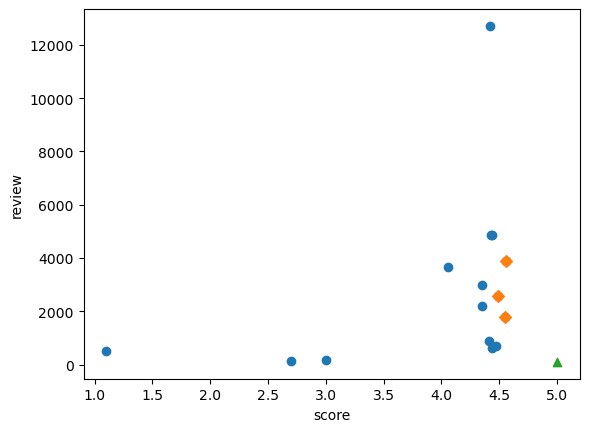

In [321]:
import matplotlib.pyplot as plt

# 별점 5점에 가게를 구한다.
distances, indexes = knr.kneighbors([[5]])

# 훈련세트의 산점도를 그린다.
plt.scatter(train_input, train_target)

# 훈련세트 중에서 이웃 샘플만 다시 그린다.
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 5점짜리 가게 데이터
plt.scatter(5, 100, marker='^')
plt.xlabel('score')
plt.ylabel('review')
plt.show()

In [323]:
print(np.mean(train_target[indexes]))

2746.0


In [327]:
print(knr.predict([[5]]))

[2746.]


In [329]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 션형회귀 모델 훈련
lr.fit(train_input, train_target)

# 별점 5점에 대해 예측
print(lr.predict([[5]]))

[4037.92642952]


In [330]:
print(lr.coef_, lr.intercept_)

[1184.95708751] -1886.8590080247277


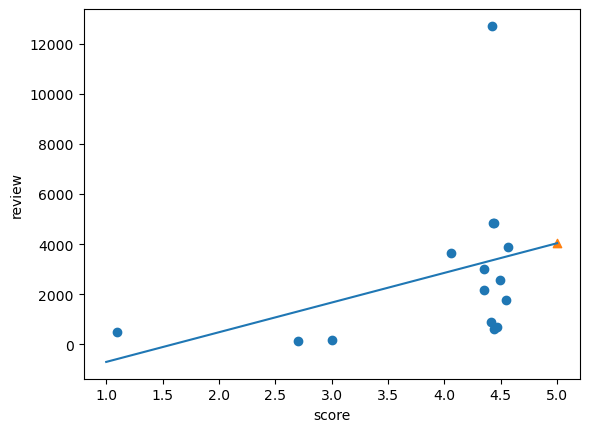

In [333]:
# 훈련세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 1~5까지 1차 방정식 그래프 그리기
plt.plot([1, 5], [1*lr.coef_+lr.intercept_, 5*lr.coef_+lr.intercept_],)

# 별점 5점 가게 데이터
plt.scatter(5, 4037.9, marker='^')
plt.xlabel('score')
plt.ylabel('review')
plt.show()

In [334]:
print(lr.score(train_input, train_target)) # 훈련세트
print(lr.score(test_input, test_target)) # 테스트세트

0.1317183179172161
0.05153228009574684


In [336]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

(15, 2) (6, 2)


In [338]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[5**2, 5]]))

[5086.35128864]


In [339]:
print(lr.coef_, lr.intercept_)

[  495.6111598  -1801.28489822] 1702.4967847541536


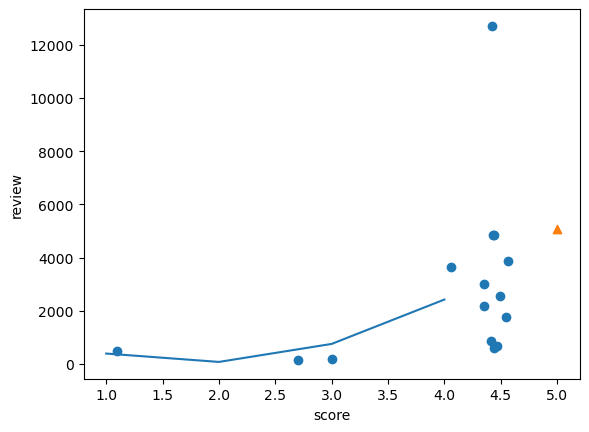

In [340]:
point = np.arange(1, 5)

plt.scatter(train_input, train_target)
plt.plot(point, 495.6*point**2 - 1801.3*point + 1702.5)

plt.scatter(5, 5086, marker='^')
plt.xlabel('score')
plt.ylabel('review')
plt.show()

In [342]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.15106813815985443
0.18497778669275078
